## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

## 1. Loading the dataset

In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# extract the zip file
#!unzip '/content/drive/My Drive/UNGDC+1970-2018.zip'
# folders of different sessions of speeches
!ls "drive/My Drive/Colab Notebooks/trinity/Converted sessions"

'Session 25 - 1970'  'Session 42 - 1987'  'Session 59 - 2004'
'Session 26 - 1971'  'Session 43 - 1988'  'Session 60 - 2005'
'Session 27 - 1972'  'Session 44 - 1989'  'Session 61 - 2006'
'Session 28 - 1973'  'Session 45 - 1990'  'Session 62 - 2007'
'Session 29 - 1974'  'Session 46 - 1991'  'Session 63 - 2008'
'Session 30 - 1975'  'Session 47 - 1992'  'Session 64 - 2009'
'Session 31 - 1976'  'Session 48 - 1993'  'Session 65 - 2010'
'Session 32 - 1977'  'Session 49 - 1994'  'Session 66 - 2011'
'Session 33 - 1978'  'Session 50 - 1995'  'Session 67 - 2012'
'Session 34 - 1979'  'Session 51 - 1996'  'Session 68 - 2013'
'Session 35 - 1980'  'Session 52 - 1997'  'Session 69 - 2014'
'Session 36 - 1981'  'Session 53 - 1998'  'Session 70 - 2015'
'Session 37 - 1982'  'Session 54 - 1999'  'Session 71 - 2016'
'Session 38 - 1983'  'Session 55 - 2000'  'Session 72 - 2017'
'Session 39 - 1984'  'Session 56 - 2001'  'Session 73 - 2018'
'Session 40 - 1985'  'Session 57 - 2002'
'Session 41 - 1986'  'Session

In [3]:
# speeches in a single folder
!ls  "drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 25 - 1970"

ALB_25_1970.txt  GBR_25_1970.txt  LBN_25_1970.txt  SLE_25_1970.txt
ARG_25_1970.txt  GHA_25_1970.txt  LBR_25_1970.txt  SLV_25_1970.txt
AUS_25_1970.txt  GIN_25_1970.txt  LBY_25_1970.txt  SOM_25_1970.txt
AUT_25_1970.txt  GMB_25_1970.txt  LKA_25_1970.txt  SYR_25_1970.txt
BEL_25_1970.txt  GTM_25_1970.txt  MAR_25_1970.txt  TGO_25_1970.txt
BLR_25_1970.txt  HND_25_1970.txt  MDG_25_1970.txt  THA_25_1970.txt
BOL_25_1970.txt  HTI_25_1970.txt  MEX_25_1970.txt  TTO_25_1970.txt
BRA_25_1970.txt  IDN_25_1970.txt  MMR_25_1970.txt  TUN_25_1970.txt
CAN_25_1970.txt  IND_25_1970.txt  NLD_25_1970.txt  TUR_25_1970.txt
CMR_25_1970.txt  IRN_25_1970.txt  NOR_25_1970.txt  UKR_25_1970.txt
COG_25_1970.txt  IRQ_25_1970.txt  NZL_25_1970.txt  URY_25_1970.txt
COL_25_1970.txt  ISL_25_1970.txt  PAK_25_1970.txt  USA_25_1970.txt
CRI_25_1970.txt  ISR_25_1970.txt  PER_25_1970.txt  VEN_25_1970.txt
CUB_25_1970.txt  ITA_25_1970.txt  PHL_25_1970.txt  YUG_25_1970.txt
DOM_25_1970.txt  JPN_25_1970.txt  PRY_25_1970.txt  ZAF_25_1970

## 2. Data Pre-processing

In [7]:
# importing libraries
import glob
import pandas as pd
import re

In [8]:
# names of all the folders in the dataset
folders = glob.glob('drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session*')

In [9]:
# list of folders
folders

['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 29 - 1974',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 73 - 2018',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 50 - 1995',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 64 - 2009',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 27 - 1972',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 51 - 1996',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 70 - 2015',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 34 - 1979',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 53 - 1998',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 38 - 1983',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 44 - 1989',
 'drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 35 - 1980',
 'drive/My Drive/Colab Notebooks/trinity

In [10]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns={'Country','Speech','Session','Year'})

In [11]:
# read speeches by USA
#speech[0].split('_') Ojo.
i = 0 
# for each folder
for file in folders:
    # getting the txt file containing speech of USA    
    speech = glob.glob(file+'/USA*.txt')
    print(speech)
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 29 - 1974/USA_29_1974.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 73 - 2018/USA_73_2018.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 50 - 1995/USA_50_1995.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 64 - 2009/USA_64_2009.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 27 - 1972/USA_27_1972.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 51 - 1996/USA_51_1996.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 70 - 2015/USA_70_2015.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 34 - 1979/USA_34_1979.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 53 - 1998/USA_53_1998.txt']
['drive/My Drive/Colab Notebooks/trinity/Converted sessions/Session 38 - 1983/USA_38_1983.txt']
['drive/My Drive/Colab Notebooks/trinity

In [12]:
# first 5 rows of the created dataset    
df.head(5)

,Speech,Year,Session,Country
0,"Last year, at the previous session [.2124th me...",1974,29,USA
1,"One year ago, I stood before the Assembly for ...",2018,73,USA
2,It is\na privilege to speak to the General Ass...,1995,50,USA
3,It is my honour to address the \nAssembly for ...,2009,64,USA
4,During the past few years the world has made r...,1972,27,USA


In [13]:
# sample speech from the dataset
df['Speech'][1]

'One year ago, I stood before the Assembly for the first time in this Hall (see A/72/ PV.3). I  addressed the  threats facing our world,  and  I presented a vision to achieve  a  brighter future for all of humankind. Today, I stand before the General Assembly to share the extraordinary progress that we have made. In less than two years, my Administration has accomplished more than almost any Administration in the history of our country.\nAmerica’s economy is booming like never before. Since my election, we have added $10 trillion in wealth. The stock market is  at  an all-time high in history, and jobless claims are at a 50-year low. African- American, Hispanic-American and Asian-American unemployment have all achieved their lowest levels ever recorded. We have added more than 4 million new jobs, including half a million manufacturing jobs. We passed the biggest tax cuts and reforms in American history. We started the construction of a major border wall and we have greatly strengthened

In [14]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
        
    return text

In [15]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [16]:
# first 5 rows of the dataset
df.head()

,Speech,Year,Session,Country,Speech_clean
0,"Last year, at the previous session [.2124th me...",1974,29,USA,"Last year, at the previous session , in my fir..."
1,"One year ago, I stood before the Assembly for ...",2018,73,USA,"One year ago, I stood before the Assembly for ..."
2,It is\na privilege to speak to the General Ass...,1995,50,USA,It is a privilege to speak to the General Asse...
3,It is my honour to address the \nAssembly for ...,2009,64,USA,It is my honour to address the Assembly for t...
4,During the past few years the world has made r...,1972,27,USA,During the past few years the world has made r...


In [17]:
# sample cleaned speech
df['Speech_clean'][1]

'One year ago, I stood before the Assembly for the first time in this Hall . I  addressed the  threats facing our world,  and  I presented a vision to achieve  a  brighter future for all of humankind. Today, I stand before the General Assembly to share the extraordinary progress that we have made. In less than two years, my Administration has accomplished more than almost any Administration in the history of our country. America’s economy is booming like never before. Since my election, we have added $10 trillion in wealth. The stock market is  at  an all time high in history, and jobless claims are at a 50 year low. African  American, Hispanic American and Asian American unemployment have all achieved their lowest levels ever recorded. We have added more than 4 million new jobs, including half a million manufacturing jobs. We passed the biggest tax cuts and reforms in American history. We started the construction of a major border wall and we have greatly strengthened border security.

In [18]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [19]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [20]:
# first 5 rows
df.head()
type(df['Sentence'] )

pandas.core.series.Series

In [21]:
# sample sentence list from the dataset
df['Sentence'][1]

['One year ago, I stood before the Assembly for the first time in this Hall ',
 ' I  addressed the  threats facing our world,  and  I presented a vision to achieve  a  brighter future for all of humankind',
 ' Today, I stand before the General Assembly to share the extraordinary progress that we have made',
 ' In less than two years, my Administration has accomplished more than almost any Administration in the history of our country',
 ' America’s economy is booming like never before',
 ' Since my election, we have added $10 trillion in wealth',
 ' The stock market is  at  an all time high in history, and jobless claims are at a 50 year low',
 ' African  American, Hispanic American and Asian American unemployment have all achieved their lowest levels ever recorded',
 ' We have added more than 4 million new jobs, including half a million manufacturing jobs',
 ' We passed the biggest tax cuts and reforms in American history',
 ' We started the construction of a major border wall and we h

In [22]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence THIS IS A SERIE
    for sent in df.loc[i,'Sentence']:
    
        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']
#BUILD A DICTIONATY
        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [23]:
# first 5 rows
df2.head()
df2.info

<bound method DataFrame.info of       Year                                           Sentence  Len
0     1974  Last year, at the previous session , in my fir...   23
1     1974   I said that the United States seeks a compreh...   14
2     1974   I asked other nations to join us in moving th...   19
3     1974   In the year that has passed some progress has...   16
4     1974   But many fundamental issues persist and new i...   15
...    ...                                                ...  ...
8943  2014   The people of the world now look to us, here,...   28
8944  2014   And at this crossroads,  I can promise the As...   26
8945  2014   We are heirs to a proud legacy of  freedom, a...   26
8946  2014   I ask  that the Assembly join us in this comm...   16
8947  2014                                                       0

[8948 rows x 3 columns]>

In [24]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [ ]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model and modified pipeline
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# function to find sentences mentioning president
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern OP':'?' matches none or one times
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)
    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
            
    return names

In [ ]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [ ]:
# first 5 rows
df2.head(15)

,Year,Sentence,Len,President_Names
0,1974,"Last year, at the previous session , in my fir...",23,[]
1,1974,I said that the United States seeks a compreh...,14,[]
2,1974,I asked other nations to join us in moving th...,19,[]
3,1974,In the year that has passed some progress has...,16,[]
4,1974,But many fundamental issues persist and new i...,15,[]
5,1974,Our deepest problem going far beyond the item...,21,[]
6,1974,Will history recall the twentieth century as ...,21,[]
7,1974,Will our age of interdependence spur joint pr...,11,[]
8,1974,The answer is not yet clear,6,[]
9,1974,New realities have not yet overcome old patte...,12,[]


In [ ]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Ford'],
 ['President Ford'],
 ['President Ford'],
 ['President Moon', 'President Xi'],
 ['President Moon'],
 ['President Xi'],
 ['President Monroe'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Yeltsin'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Clinton'],
 ['President Abbas'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Kennedy'],
 ['President Yeltsin'],
 ['President Kennedy'],
 ['President Kennedy'],
 ['President Carter'],
 ['President Mondaleat'],
 ['President Dwight'],
 ['President Abraham'],
 ['President Carter', 'President in January'],
 ['President Carter'],
 ['President Carter'],
 ['President de'],
 ['President Kennedy'],
 ['President Roosevelt'],
 ['President Al'],
 ['President Gore'],
 ['President Sarney'],
 ['President of Iran'],
 ['President Putin'],
 ['President Rouhani'],
 ['President Rouhani'],
 ['President Rouhani'],
 ['President Nixon'],
 [

In [ ]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' As President Nixon said to this General Assembly in 1969, our objective is ',
 ' President Nixon has proposed a cease fire in all of IndoChina under international supervision, an exchange of prisoners of war, and a total withdrawal of United States forces',
 ' President Nixon has also pledged a major effort to assist both VietNamese States in post war reconstruction',
 " As President Nixon said last week, “Every Government which wants to move against narcotics should know that it can count on our country for our wholehearted support and assistance in doing so'",
 ' President Yeltsin and I agreed in June, even as we await Russian ratification of START II, to begin talks on a START III treaty that will cut our cold  war arsenals by 80 per cent from their height',
 ' This week the Security Council will hold an unprecedented ministerial meeting on African security, which our Secretary of State is proud to chair, and which President Mugabe, Chairman of the Organization of African Unity, 

In [ ]:
# number of sentences containing president's mention
len(sentences_president)

107

In [ ]:
# sample sentences with president's mention
sentences_president[1]

' President Nixon has proposed a cease fire in all of IndoChina under international supervision, an exchange of prisoners of war, and a total withdrawal of United States forces'

In [ ]:
# sample sentences with president's mention
sentences_president[10]

' Thirty two years ago President Kennedy warned this Assembly that humanity lived under a nuclear sword of Damocles that hung by the slenderest of threads'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [ ]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expr

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,1972,During the past few years the world has made r...,29,[],0
1,1972,"In 1972 alone, the United States and the Sovi...",49,[],0
2,1972,The Soviet Union and the United States have a...,29,[],0
3,1972,The United States and the People Republic of ...,56,[],0
4,1972,"The United Kingdom, France, the Soviet Union ...",29,[],0


In [ ]:
# to extract initiatives using pattern matching
def all_schemes(text,check):
    
    schemes = []
    
    doc = nlp(text)
    
    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']
    
    # pattern to match initiatives names 
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]
    
    if check == 0:
        # return blank list
        return schemes

    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("matching", None, pattern) 
    matches = matcher(doc)

    for i in range(0,len(matches)):
        
        # match: id, start, end
        start, end = matches[i][1], matches[i][2]
        
        if doc[start].pos_=='DET':
            start = start+1
        
        # matched string
        span = str(doc[start:end])
        
        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)
        
    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,1972,During the past few years the world has made r...,29,[],0,[]
1,1972,"In 1972 alone, the United States and the Sovi...",49,[],0,[]
2,1972,The Soviet Union and the United States have a...,29,[],0,[]
3,1972,The United States and the People Republic of ...,56,[],0,[]
4,1972,"The United Kingdom, France, the Soviet Union ...",29,[],0,[]


In [ ]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['North American Free Trade Agreement'],
 ['African Crisis Response Initiative'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['San Francisco Conference'],
 ['World Food Conference'],
 ['World Population Conference', 'World Food Conference'],
 ['San Francisco Conference'],
 ['Caribbean Basin initiative'],
 ['Third Review Conference'],
 ['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['Suez Canal agreement'],
 ['San Francisco Conference'],
 ['Caribbean Basin Initiative'],
 ['North Atlantic alliance'],
 ['Geneva Peace Conference'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['Global Peace Operations Initiative'],
 ['San Francisco Conference'],
 ['Women Entrepreneurs Finance Initiative'],
 ['Arab Peace Initiative'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['Third

In [ ]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' That is why the United States wants to complete the Uruguay Round of  the negotiations within the General Agreement on Tariffs and Trade  as  soon as possible, and to create a network of free trade agreements, beginning  with the North American Free Trade Agreement',
 ' It is why we are working with friends in Africa to build the African Crisis Response Initiative, which has trained more than 4,000 peacekeepers from six countries',
 ' The United States will continue its strong efforts to advance the United Nations plan for Namibia',
 ' I am convinced that the United Nations plan would be implemented fairly',
 ' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth',
 ' The United States is prepared to join with all nations at the World Food Conference in Rome to launch the truly massive effort which is required',
 ' The 

In [ ]:
# number of sentences which mentions some initiatives
len(initiatives)

40

In [ ]:
# sample sentences containing initiatives
initiatives[0]

' That is why the United States wants to complete the Uruguay Round of  the negotiations within the General Agreement on Tariffs and Trade  as  soon as possible, and to create a network of free trade agreements, beginning  with the North American Free Trade Agreement'

In [ ]:
# sample sentences containing initiatives
initiatives[3]

' I am convinced that the United Nations plan would be implemented fairly'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

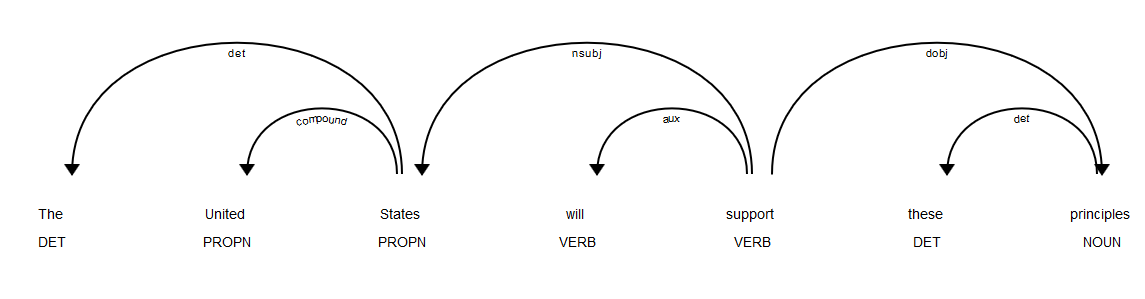

In [ ]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [ ]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[world make advances]
1,1972,"In 1972 alone, the United States and the Sovi...",[]
2,1972,The Soviet Union and the United States have a...,[Union place limitations]
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [ ]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):
    
    if len(df_rule3.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule3.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [ ]:
df_show.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[world make advances]
1,1972,The Soviet Union and the United States have a...,[Union place limitations]
2,1972,The Federal Republic of Germany and the Germa...,[Republic open negotiations]
3,1972,And North and South Korea have intensified th...,[Korea intensify talks]
4,1972,"If continued, this process will in time find ...",[process find reflection]


In [ ]:
# number of outputs
df_show.shape

(3364, 3)

In [ ]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [ ]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,During the past few years the world has made r...,1972,[world],make,[advances]
1,The Soviet Union and the United States have a...,1972,[Union],place,[limitations]
2,The Federal Republic of Germany and the Germa...,1972,[Republic],open,[negotiations]
3,And North and South Korea have intensified th...,1972,[Korea],intensify,[talks]
4,"If continued, this process will in time find ...",1972,[process],find,[reflection]


In [ ]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

take       143
make       119
support     91
give        79
see         78
face        55
seek        52
build       50
pursue      48
require     45
Name: Verb, dtype: int64

In [ ]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
14,"And, in recognition of the importance of trad...",1972,[we],support,[participation]
29,From the start the United States has supporte...,1972,[States],support,[effort]
67,As we support the historic growth of democra...,1992,[we],support,[growth]
79,We fully support the efforts of the North At...,1992,[We],support,[efforts]
151,That is why we have supported the efforts of ...,1999,[we],support,[efforts]
172,"As I think most Members know, I have strongly...",1999,[I],support,[States]
245,The United States supports political and econ...,2002,[States],support,[liberty]
265,Those names include a man who supported his w...,2001,[who],support,[wife]
372,The United States strongly supports his leade...,1997,[States],support,[leadership]
389,We must support the principles of non interve...,1980,[We],support,[principles]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [ ]:
from spacy import displacy 
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [ ]:
# function for rule 4
def rule4(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[past few years, remarkable advances, Charter ..."
1,1972,"In 1972 alone, the United States and the Sovi...","[military confrontations, sovereign equality, ..."
2,1972,The Soviet Union and the United States have a...,"[precise limitations, next years, offensive mi..."
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...","[specific provisions, unimpeded movement]"


In [ ]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

for row in range(len(df_rule4)):
    
    if len(df_rule4.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule4.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [ ]:
# number of matches 
df_show.shape

(6167, 3)

In [ ]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[past few years, remarkable advances, Charter ..."
1,1972,"In 1972 alone, the United States and the Sovi...","[military confrontations, sovereign equality, ..."
2,1972,The Soviet Union and the United States have a...,"[precise limitations, next years, offensive mi..."
3,1972,"The United Kingdom, France, the Soviet Union ...","[specific provisions, unimpeded movement]"
4,1972,And North and South Korea have intensified th...,"[divided families, joint committee]"
5,1972,There have been many other accomplishments in...,[Charter objectives]
6,1972,I mention these merely to illustrate how old ...,[old patterns]
7,1972,"If continued, this process will in time find ...",[positive reflection]
8,1972,"We are encouraged, too, by calls in both East...",[Eastern capitals]
9,1972,A step toward realizing this goal would be th...,"[stable military balance, force reductions]"


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [ ]:
# modifying rule 4
def rule4_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    # iterate over tokens
    for token in doc:
        
        if token.i == index:
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [ ]:
# using rule 3 and rule 4
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [ ]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[ world make remarkable advances]
1,1972,"In 1972 alone, the United States and the Sovi...",[]
2,1972,The Soviet Union and the United States have a...,[ Soviet Union place precise limitations]
3,1972,The United States and the People Republic of ...,[]
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [ ]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show_mod = df_show_mod.append(df_rule.loc[row,:])

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [ ]:
# number of matches
df_show_mod.shape

(3364, 3)

In [ ]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,[ world make remarkable advances]
1,1972,The Soviet Union and the United States have a...,[ Soviet Union place precise limitations]
2,1972,The Federal Republic of Germany and the Germa...,[ Federal Republic open negotiations]
3,1972,And North and South Korea have intensified th...,[ Korea intensify talks]
4,1972,"If continued, this process will in time find ...",[ process find positive reflection]
5,1972,A conference whose over all effect was to put...,[ conference prolong problems]
6,1972,"On the other hand, a conference which promote...",[ conference reinforce trend]
7,1972,That is why we believe that the conference mu...,[ conference take practical steps]
8,1972,We are also now studying alternative approach...,[ We study alternative approaches]
9,1972,The United States will pursue the following g...,[ United States pursue general aims]


In [ ]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' process find positive reflection']
 If continued, this process will in time find positive reflection within the United Nations itself


In [ ]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' President Nixon pledge major effort']
 President Nixon has also pledged a major effort to assist both VietNamese States in post war reconstruction


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [ ]:
# Sample sentence
from spacy import displacy 
displacy.render(nlp('''We all believe the benefits of globalization must 
be allocated more broadly within and among societies'''), 
                style='dep',jupyter=True)

In [ ]:
# rule 5 function
def rule5(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [ ]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    
    # rule
    output = rule5(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[advances toward goal, goal of, peace with]"
1,1972,"In 1972 alone, the United States and the Sovi...","[equality of countries, interference in affairs]"
2,1972,The Soviet Union and the United States have a...,[]
3,1972,The United States and the People Republic of ...,"[understanding between peoples, relations betw..."
4,1972,"The United Kingdom, France, the Soviet Union ...",[]


In [ ]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule.loc[row,:])

# reset the index
df_show.reset_index(inplace = True, drop = True)

In [ ]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,1972,During the past few years the world has made r...,"[advances toward goal, goal of, peace with]"
1,1972,"In 1972 alone, the United States and the Sovi...","[equality of countries, interference in affairs]"
2,1972,The United States and the People Republic of ...,"[understanding between peoples, relations betw..."
3,1972,The Federal Republic of Germany and the Germa...,[negotiations on treaty]
4,1972,And North and South Korea have intensified th...,"[talks on plight, plight of families, problems..."


In [ ]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [ ]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,During the past few years the world has made r...,1972,advances,toward,[goal]
1,During the past few years the world has made r...,1972,goal,of,[]
2,During the past few years the world has made r...,1972,peace,with,[]
3,"In 1972 alone, the United States and the Sovi...",1972,equality,of,[countries]
4,"In 1972 alone, the United States and the Sovi...",1972,interference,in,[affairs]
5,The United States and the People Republic of ...,1972,understanding,between,[peoples]
6,The United States and the People Republic of ...,1972,relations,between,[]
7,The United States and the People Republic of ...,1972,interests,of,[States]
8,The United States and the People Republic of ...,1972,hegemony,in,[Asia]
9,The United States and the People Republic of ...,1972,division,of,[world]


In [ ]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

of         6123
in         1239
for         890
to          576
on          364
with        249
between     204
from        146
against     126
by           89
Name: Preposition, dtype: int64

In [ ]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
103,This fact has often been cited in attacks aga...,1972,attacks,against,[]
137,The United Nations can also make a substantia...,1972,fight,against,[traffic]
180,"But political passion, however deeply held, c...",1972,violence,against,[persons]
181,Certainly the terrorist acts I have cited are...,1972,attacks,against,[fabric]
201,The draft articles on the prevention and puni...,1972,crimes,against,[agents]
221,These actions would mark a major advance in ...,1972,struggle,against,[terrorism]
231,A great struggle against dictatorship had be...,1992,struggle,against,[dictatorship]
340,"Therefore, we are working towards a cooperati...",1992,defence,against,[attacks]
376,"And in the face of today changes, with the ...",1992,walls,against,[trade]
377,"And in the face of today changes, with the ...",1992,walls,against,[people]
